<a href="https://colab.research.google.com/github/carlocamilloni/Structural-Bioinformatics/blob/main/quantum_chemistry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Quantum Chemistry calculation using CP2K

The goal of this experience is to run some density-functional theory (DFT) calculation. The program we use is cp2k (www.cp2k.org).

In this kind of calculation, one first tries to find the electronic density and the energy for a configuration of a molecule. The electronic density is the object one measures by X-Ray crystallography and is the density of all the electrons of a system. From the electronic density and the energy is then in principle possible to calculate the forces on the nuclei and then make the nuclei move.

Actually, already calculating the electronic density for a single configuration of the nuclei is a relatively expensive task. This is not obtained directly but using an iterative procedure, so first a guess for the electronic density is generated randomly and then it is iteratively modified until the energy doesn’t change anymore.

1)	In this first task we will calculate the electronic density for a hydrogen atom and learn how to visualize it with VMD.

2)	In the second task we will calculate the electronic density for a carbon atom and a methane molecule. 

3)	In the third task we will calculate the electronic density and the energy for a Na-Cl placed at increasing distance

4)	We will simulate a H-transfer reaction in water

5)	We will simulate the density of a small protein 


# SETUP and PRELIMINARY stuff

As usual:


*   Mount google drive
*   Make a folder for the task
*   Make a copy of this notebook




In [1]:
# mount google drive  
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# install cp2k
!apt update
!apt-get install cp2k
%pip install ase pycp2k

# other setup stuff
ASE_CP2K_COMMAND="mpirun -np 2 cp2k_shell.popt"

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:14 http://ppa

In [21]:
# set the path to your local task folder
local_path='/content/drive/MyDrive/Task4'
%cd {local_path}

/content/drive/MyDrive/Task4


Add this folder to your google drive:
https://drive.google.com/drive/folders/1IS_Ytn3d14l3esUSTp1bbbaDQ2QqZHGA?usp=sharing
(use add shortcut to drive or similar)

## Hydrogen atom

In [45]:
%cd {local_path}
%rm -f hydrogen*

"""
This will calculate the energy and the electronic density of an hydrongen atom
"""
from pycp2k import CP2K

# The CP2K object is normally initialized
calc = CP2K()
calc.working_directory = "./"
calc.project_name = "hydrogen"
calc.mpi_n_processes = 2

# This function tries to read the input file in the given path 
calc.parse("/content/drive/MyDrive/StructB/qm/H.txt")

# The calculation can be modified and run after reading the input file
calc.run()
# After you have run

/content/drive/MyDrive/Task4
|============================ PYCP2K RUN STARTED ==============================|
  >> CP2K version check...
  >> Creating CP2K input file...
  >> Performing syntax check on input file...
  >> Running CP2K:
     -CP2K version: 5.1
     -CP2K revision: svn:18091
     -CP2K command: cp2k.popt
  >> CP2K calculation finished succesfully!
  >> Elapsed time: 0h:0m:4s
|=========================== PYCP2K RUN FINISHED =============================|


In [46]:
# after running the calculation you can see the output files in you folder:
%cd {local_path}
%ls hydrogen*
# hydrogen.inp is your input
# hydrogen.out is the output text from the program
# hydrogen-RESTART.wfn is a restart file
# The files .cube have the data about the final electron density. 


/content/drive/MyDrive/Task4
hydrogen-ELECTRON_DENSITY-1_0.cube  hydrogen-RESTART.wfn
hydrogen.inp                        hydrogen-SPIN_DENSITY-1_0.cube
hydrogen.out


In [47]:
# to see the output file you can double click on hydrogen.out or run
%cat hydrogen.out

 DBCSR| Multiplication driver                                               BLAS
 DBCSR| Multrec recursion limit                                              512
 DBCSR| Multiplication stack size                                           1000
 DBCSR| Maximum elements for images                                    UNLIMITED
 DBCSR| Multiplicative factor virtual images                                   1
 DBCSR| Multiplication size stacks                                             3
 DBCSR| Number of 3D layers                                               SINGLE
 DBCSR| Use MPI memory allocation                                              T
 DBCSR| Use RMA algorithm                                                      F
 DBCSR| Use Communication thread                                               T
 DBCSR| Communication thread load                                             87


  **** **** ******  **  PROGRAM STARTED AT               2021-11-22 14:26:42.175
 ***** ** ***  *** **   PR

In the log you can see a lot of information. In particular after some initial comments you should see something like this: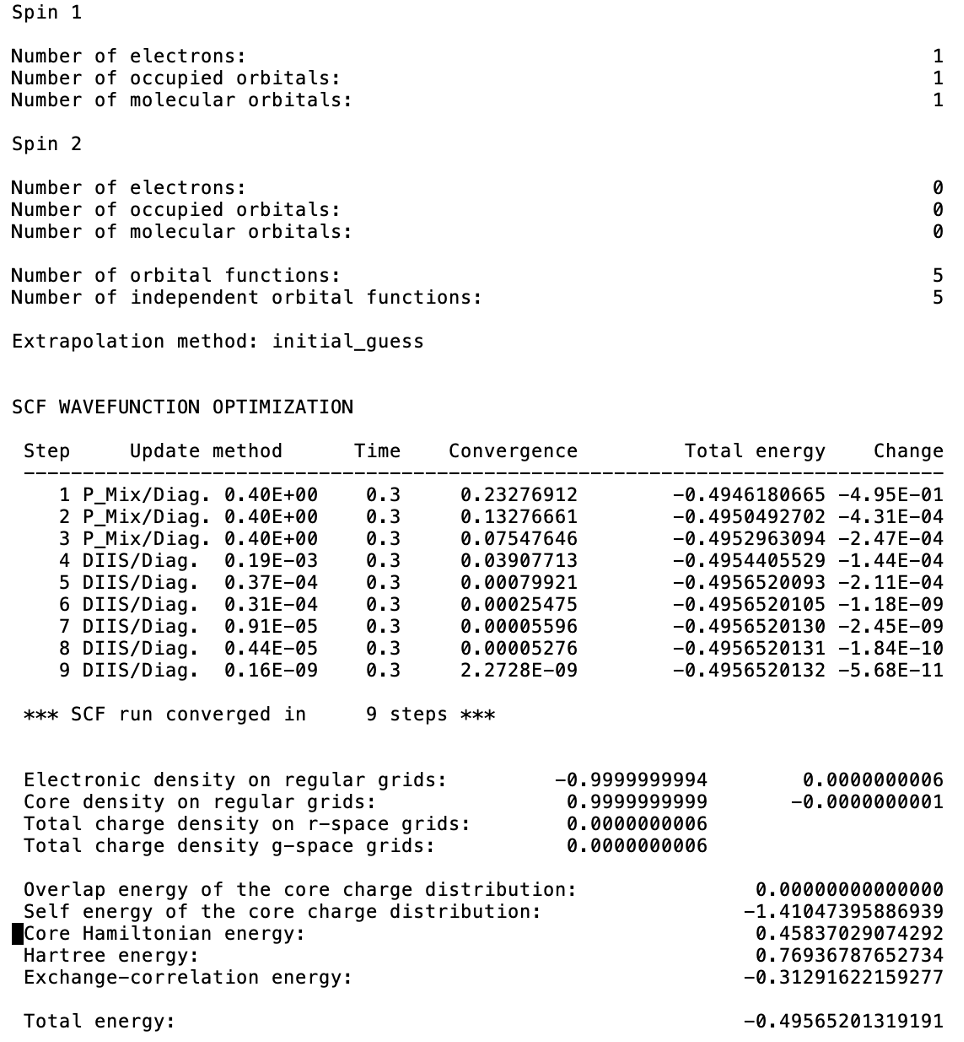

This is telling that there is one electron with spin 1 (we can think about it as spin up) and 0 electron with spin 2 (e.g. spin down). There is an initial guess of the density of this electron. That is the probability of finding the electron in the box. This initial density is then optimized until the density and the corresponding energy don’t change anymore (you see that after 9 iteration of the code the difference between two consecutive iterations (Change) is going to smaller and smaller numbers. After that it checks that the electronic density is actually -1 (the charge of the electron is negative) and it reports the total energy -0.497 Hartree (or A.U., atomic unit) 1 Hartree = 27.211 eV (electron Volt)


You can also print the content of the input file hydrogen.inp:


In [48]:
%cat /content/drive/MyDrive/StructB/qm/H.txt

&FORCE_EVAL
  METHOD Quickstep
  &DFT
# density functional theory
# files with Gaussian basis sets
    BASIS_SET_FILE_NAME BASIS_SET 
# files with pseudopotentials
    POTENTIAL_FILE_NAME POTENTIAL
# local spin density
    LSD
# non-local plane-wave basis set
    &MGRID
# maximum energy (in Rydberg, the higher the more accurate)
      CUTOFF 350
      REL_CUTOFF 50    
    &END MGRID
    &SCF
# criterion to stop the energy calculation
      EPS_SCF 1.0E-6
# maximum number of iterations
      MAX_SCF 100
# initial guess of the density
      SCF_GUESS atomic
    &END SCF
    &XC
# XC potential
      &XC_FUNCTIONAL PBE 
      &END XC_FUNCTIONAL
    &END XC
    &PRINT
# write the electronic density on file
      &E_DENSITY_CUBE
        FILENAME
      &END E_DENSITY_CUBE
    &END PRINT
  &END DFT
  &SUBSYS
    &CELL
# box size in angstrom
      ABC 5 5 5
    &END CELL
    &TOPOLOGY
# coordinates file
      COORD_FILE_NAME /content/drive/MyDrive/StructB/qm/H.pdb     
      COORD_FILE_FORMAT 

We are using a box ABC that is cubic with side 5 Angstrom, we are placing there an hydrogen atom whose coordinates are in the file H.pdb.

We are using a exchange and correlation (XC) potential named PBE

We are using a BASIS SET named DZVP-GTH-PBE

We are using a PSEUDOPOTENTIAL for our hydrogen electron that is called GTH-PBE-q1

Now we can visualise the DENSITY with VMD. Copy the density file on the workstation 
hydrogen-ELECTRON_DENSITY-1_0.cube (the SPIN density and the ELECTRON density in this case are equivalent because there is one single electron). VMD can open the cube format.

The isosurface representation allows visualising regions of different density, so you can see where the density is higher and lower. The integral of the density in the box will be 1. The possible range of value is given by Range (min, max)


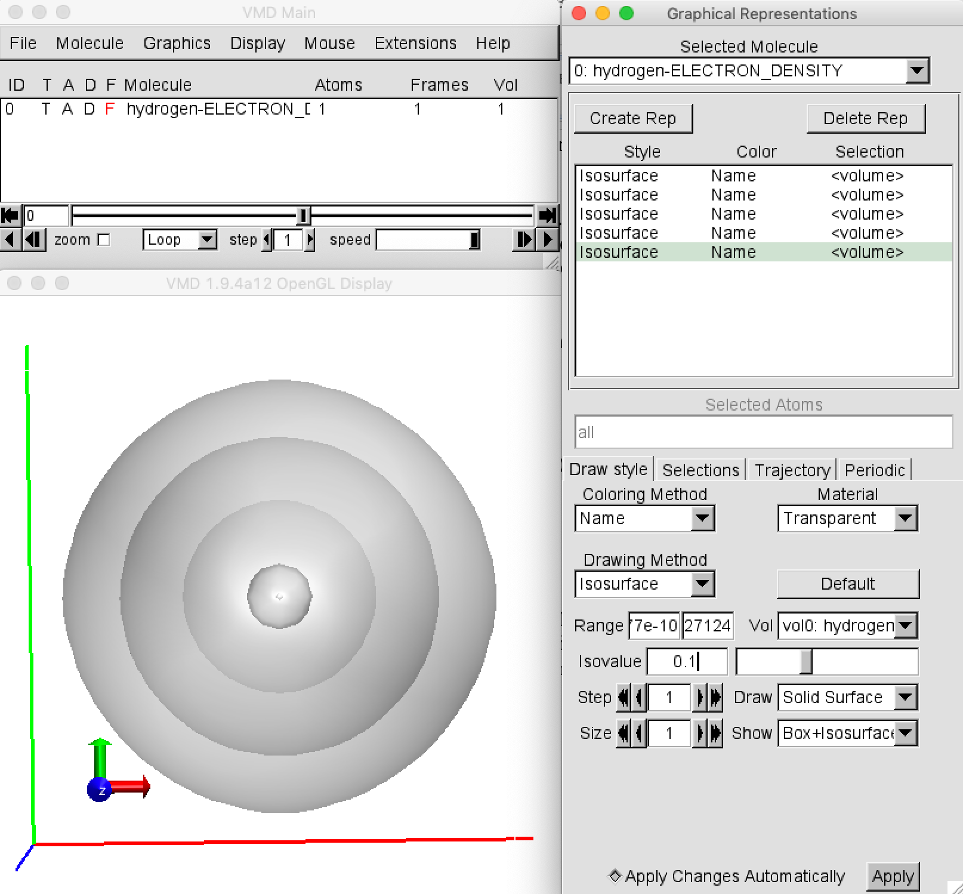

Try the following representations:

1.	Isosurface, Draw: solid surface, isovalue 0.25 (a very high value)
2.	Isosurface, Draw: solid surface, Material: transparent, isovalue 0.1
3.	The same decreasing isovalue to 0.01
4.	..


You can see that the electron density is larger than 0 even at 2.5 angstrom from the nucleus (the box is 5 angstrom large). This means that there is a small chance that the electron can be relatively far from its nucleus. 


## Carbon atom

As before we can run it as:

In [51]:
%cd {local_path}
%rm -f carbon*

"""
This will calculate the energy and the electronic density of a carbon atom
"""
from pycp2k import CP2K

# The CP2K object is normally initialized
calc = CP2K()
calc.working_directory = "./"
calc.project_name = "carbon"
calc.mpi_n_processes = 2

# This function tries to read the input file in the given path 
calc.parse("/content/drive/MyDrive/StructB/qm/C.txt")

# The calculation can be modified and run after reading the input file
calc.run()
# After you have run

/content/drive/MyDrive/Task4
|============================ PYCP2K RUN STARTED ==============================|
  >> CP2K version check...
  >> Creating CP2K input file...
  >> Performing syntax check on input file...
  >> Running CP2K:
     -CP2K version: 5.1
     -CP2K revision: svn:18091
     -CP2K command: cp2k.popt
  >> CP2K calculation finished succesfully!
  >> Elapsed time: 0h:0m:19s
|=========================== PYCP2K RUN FINISHED =============================|


Here in principle we are simulating 6 electrons. In practice, to speed up the calculation the core electrons are generally including in the nucleus. This means for example that in the case of carbon the nucleus has a charge of +6 (6 protons) -2 (2 core electron is 1S) = +4. So, the simulation will only calculate the 4 valence electrons.

We have 4 valence electrons, in the textbook representation:
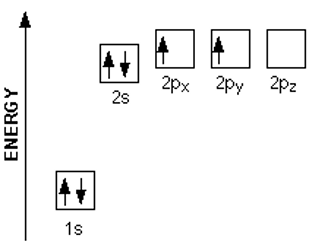

You can visualise the density as before (now the box is a bit larger, 6 angstrom). This time, if you look at the density for large isovalue you can see that there are two concentric spheres. This because there is some empty-space that should be occupied by the two core electrons. You can also open together the carbon and the hydrogen and make some comparison (use different colors for the two). For the same isovalue (that is the same probability surface) the occupied space is different, indeed in the carbon atom there are more electrons that can be found.

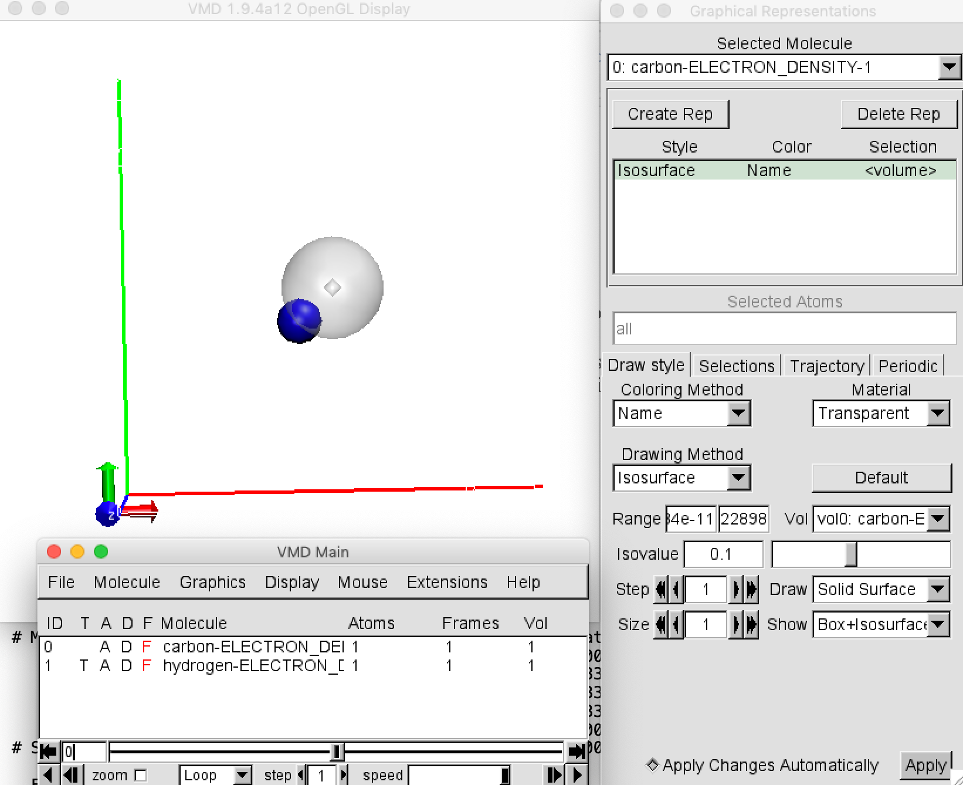

If you look at how the shape of the carbon density is in space, does this makes sense to you?

If you open the log file after the iterative calculation of the density there is an analysis of the molecular orbitals. Alpha orbitals are spin-up and beta spin-down. Remember that 1S is not considered. So the first MO is 2S, then 2Px, 2Py, 2Pz, 3S, … the eigenvalue is the energy of the electron in that orbital and the occupation is what is the probability of finding an electron in that orbital. 

 ALPHA MO EIGENVALUES AND MO OCCUPATION NUMBERS

### MO index          MO eigenvalue [a.u.]            MO occupation
         1                     -0.476694                 1.000000
         2                     -0.168137                 0.333333
         3                     -0.168137                 0.333333
         4                     -0.168137                 0.333333
         5                      0.326836                 0.000000
### Sum                                                    2.000000

  Fermi energy:                -0.168796



 BETA MO EIGENVALUES AND MO OCCUPATION NUMBERS

### MO index          MO eigenvalue [a.u.]            MO occupation
         1                     -0.476694                 1.000000
         2                     -0.168137                 0.333333
         3                     -0.168137                 0.333333
         4                     -0.168137                 0.333333
         5                      0.326836                 0.000000
### Sum                                                    2.000000

If you think about Boltzmann probability

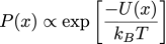

if two orbitals have the same energy, what is their relative probability?


## Methane

As before you can run it as:

In [53]:
%cd {local_path}
%rm -f CH4* methane*

"""
This will calculate the energy and the electronic density of a carbon atom
"""
from pycp2k import CP2K

# The CP2K object is normally initialized
calc = CP2K()
calc.working_directory = "./"
calc.project_name = "methane"
calc.mpi_n_processes = 2

# This function tries to read the input file in the given path 
calc.parse("/content/drive/MyDrive/StructB/qm/CH4.txt")

# The calculation can be modified and run after reading the input file
calc.run()
# After you have run

/content/drive/MyDrive/Task4
|============================ PYCP2K RUN STARTED ==============================|
  >> CP2K version check...
  >> Creating CP2K input file...
  >> Performing syntax check on input file...
  >> Running CP2K:
     -CP2K version: 5.1
     -CP2K revision: svn:18091
     -CP2K command: cp2k.popt
  >> CP2K calculation finished succesfully!
  >> Elapsed time: 0h:0m:5s
|=========================== PYCP2K RUN FINISHED =============================|


Even if as you can guess we have now 8 electrons to simulate, this calculation is actually not that slower than the one of the single Carbon, this because this is a “closed shell” calculation, all Molecular Orbitals are occupied and the density is much more stable. 

Once the calculation is done, as before copy the Electron density on the workstation and look at it with VMD. 

What happen to the density for example with respect to a single Carbon atom? 

What are you looking at?


## Ionic bond between NA and CL

In this exercise we will calculate the density energy of the two atoms from far apart and getting close by. This will allow to calculate the interaction energy of the two atoms.

In this case the coordinates of the system are written inside the input file NACL.txt, the box side is 16 Ang:


In [55]:
%cat /content/drive/MyDrive/StructB/qm/NACL.txt

&FORCE_EVAL
  METHOD Quickstep
  &DFT
    BASIS_SET_FILE_NAME BASIS_SET
    POTENTIAL_FILE_NAME POTENTIAL
    LSD
    &MGRID
      CUTOFF 350
      REL_CUTOFF 50
    &END MGRID
    &SCF
      EPS_SCF 1.0E-6
      MAX_SCF 100
      SCF_GUESS RESTART 
      &OT
        PRECONDITIONER FULL_ALL
        MINIMIZER DIIS
      &END OT
    &END SCF
    &XC
      &XC_FUNCTIONAL PBE 
      &END XC_FUNCTIONAL
    &END XC
    &PRINT
      &E_DENSITY_CUBE
        FILENAME
      &END E_DENSITY_CUBE
    &END PRINT
     &POISSON
       PERIODIC  NONE
       POISSON_SOLVER WAVELET
     &END POISSON
  &END DFT
  &SUBSYS
    &CELL
      ABC   16.  16.  16.
      PERIODIC NONE
    &END CELL
    &COORD
       Na   4.000000  8.000000  8.000000
       Cl  12.000000  8.000000  8.000000
    &END COORD
    &KIND Na
      BASIS_SET DZVP-GTH-PBE
      POTENTIAL GTH-PADE-q9
    &END KIND
    &KIND Cl
      BASIS_SET DZVP-GTH-PBE
      POTENTIAL GTH-PADE-q7
    &END KIND
  &END SUBSYS
&END FORCE_EVAL
&GLOBAL
  PROJE

At the beginning the atoms are placed at a distance of 8 angstrom (12-4) along the x direction.

Furthermore, to make the calculation more accurate we will be using 9 valence electrons for NA (all the 2p8 + 3s1) and 7 electrons for CL (3s2 + 3p5).

The goal is to run some energy calculations moving the two atoms closer and closer in space, and make a table like:

```
DISTANCE - ENERGY
8		   xxx
…		   …
```

Start by running the first simulation (it can take 10 minutes):


In [58]:
%cd {local_path}
%rm -f nacl-8*

"""
This will calculate the energy and the electronic density of a NA and CL atoms
"""
from pycp2k import CP2K

# The CP2K object is normally initialized
calc = CP2K()
calc.working_directory = "./"
calc.project_name = "nacl-8"
calc.mpi_n_processes = 2

# This function tries to read the input file in the given path 
calc.parse("/content/drive/MyDrive/StructB/qm/NACL.txt")

# The calculation can be modified and run after reading the input file
calc.run()
# After you have run

/content/drive/MyDrive/Task4
|============================ PYCP2K RUN STARTED ==============================|
  >> CP2K version check...
  >> Creating CP2K input file...
  >> Performing syntax check on input file...
  >> Running CP2K:
     -CP2K version: 5.1
     -CP2K revision: svn:18091
     -CP2K command: cp2k.popt
  >> CP2K calculation finished succesfully!
  >> Elapsed time: 0h:9m:40s
|=========================== PYCP2K RUN FINISHED =============================|


At this point you can change the distance between the two atoms to make them closer


To edit the file, go the page with the list of files, select it and then click (at the top) on duplicate, and then rename it.
Now to actually edit it is enough to click on it, it will open a new page where you can edit it and save it. 

Decrease the distance by no more than 1 angstrom every time, so that the simulation, by restarting from the results of the previous one will run faster

    &COORD
       Na   x1  8.000000  8.000000
       Cl    x2 8.000000  8.000000
    &END COORD

Change also the "project_name=nacl-xx" setting the new distance in place of xx so that your files don't get overwritten

In [ ]:
"""
This will calculate the energy and the electronic density of a NA and CL atoms as a function of their relative distance
"""
from pycp2k import CP2K

# The CP2K object is normally initialized
calc = CP2K()
calc.working_directory = "./"
calc.project_name = "nacl-xx"
calc.mpi_n_processes = 2

# This function tries to read the input file in the given path 
calc.parse("/content/drive/MyDrive/StructB/qm/NACL.txt")
calc.run()

Once it is finished find the value for the energy and add it to your table.

-	PLOT the ENERGY vs DISTANCE
-	What is the energy difference corresponding to the ionic bond?
-	How does the density look like when the atoms are far and close? 
-	How does it compare with a covalent bond (for example with respect to Methane)?



In [66]:
# the following line will print the energy from all the nacl-xx.out files you produced
!for i in nacl*.out; do echo $i; grep ENERGY $i | grep Total; done

nacl.out
 ENERGY| Total FORCE_EVAL ( QS ) energy (a.u.):              -62.666244813707031


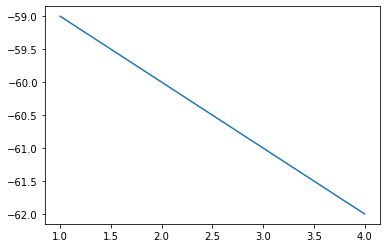

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# write here the distances for which you ran the calculation
x=[1.0,2.0,3.0,4.0]
# write here the corresponding energy values
e=[-59,-60,-61,-62]

# check the matplotlib plot method to add axis labels and points
plt.plot(x, e)
plt.show()

## MD of water and Proton Transfer

Till now we have only calculated the electronic density given a configuration, this is the starting point to perform dynamics. From the electron density it is possible to calculate the forces on the nuclei and then move them as classical particles. Here our starting configuration is a small box of water with a H3O+ and an OH- and we will see how fast or slow is a proton transfer in water.

you will run a 50 steps (50 fs) long ab-initio MD:


In [ ]:
%cd {local_path}
%rm -f water*

"""
This will calculate the energy and the electronic density of a NA and CL atoms
"""
from pycp2k import CP2K

# The CP2K object is normally initialized
calc = CP2K()
calc.working_directory = "./"
calc.project_name = "water"
calc.mpi_n_processes = 2

# This function tries to read the input file in the given path 
calc.parse("/content/drive/MyDrive/StructB/qm/H-transfer.txt")

# The calculation can be modified and run after reading the input file
calc.run()
# After you have run

/content/drive/MyDrive/Task4
|============================ PYCP2K RUN STARTED ==============================|
  >> CP2K version check...
  >> Creating CP2K input file...
  >> Performing syntax check on input file...
  >> Running CP2K:
     -CP2K version: 5.1
     -CP2K revision: svn:18091
     -CP2K command: cp2k.popt


it will take a few minutes… but you should see that after the first step the calculation is faster. Indeed, the electronic density does not change much at each step so it is then easier to reoptimize it. 

After is finished you should have a water-pos-1.xyz file. This is the trajectory. You can copy it on the workstation and visualize it with VMD.

Here bonds can be broken so we need a proper visualization. For example, we can use VDW with small spheres. And DYNAMICSBONDS:
We can also add HYDROGENBONDs


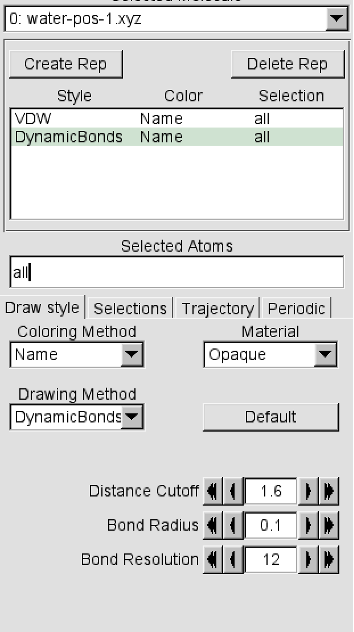

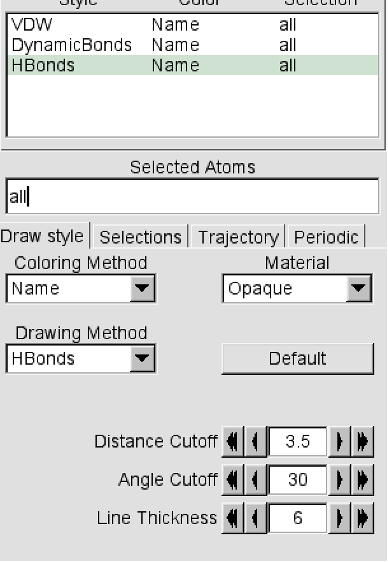

How does the proton transfer happen? 
Are the water molecules in some special arrangement?


## Electronic density for a small protein

Here we will calculate the electronic density for a single molecule of insulin. For this particular example we will use lower accuracy settings.

run it as usual:


In [ ]:
%cd {local_path}
%rm -f insulin*

"""
This will calculate the energy and the electronic density of a NA and CL atoms
"""
from pycp2k import CP2K

# The CP2K object is normally initialized
calc = CP2K()
calc.working_directory = "./"
calc.project_name = "insulin"
calc.mpi_n_processes = 2

# This function tries to read the input file in the given path 
calc.parse("/content/drive/MyDrive/StructB/qm/insulin.txt")

# The calculation can be modified and run after reading the input file
calc.run()
# After you have run

Once the calculation is done it is possible to visualize the electron density in VMD. This is what one gets from X-Ray scattering in particular in the case of crystals.